In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1D

In [13]:
ITERMAX = 1000000
N = 101
loops = 10000
omega = 1
x = np.linspace(0,1,N)
h = np.abs(x[1] - x[0])
source = 12*x**2
#source = np.zeros(N,dtype = np.float64) ## -source
#pot = np.random.rand(N)
pot = np.ones(N,dtype = np.float64)
pot[0] = 0
pot[-1] = 0
new_pot = np.copy(pot)
energy = np.zeros(ITERMAX,dtype=np.float64)
diff = 1
tolerance = 1e-10


In [14]:
i = 0
while(diff > tolerance):
    if( i >= ITERMAX):
        print("Reached iteration limit, Stopping.")
        break
    new_pot[1:-1] = (1-omega)*pot[1:-1] + omega/2.0 * ( pot[:-2] + pot[2:] + h**2 *source[1:-1])
    new_pot[-1] = 0.5*(2*pot[-2] + h**2*source[-1])
    #new_pot[0]  = 0.5*(2*pot[1]  + h**2*source[0] )
    #new_pot[0] = 0
    energy[i] = 1/(2*h) * np.sum( ( new_pot[:-1] - new_pot[1:])**2 ) - h * np.sum(source[0:-1]*new_pot[0:-1])
    diff = np.sum( (new_pot - pot)**2  )
    np.copyto(pot,new_pot)
    i += 1
print(i,diff,energy[i-1])

77568 9.995326237386972e-11 -4.963565940993726


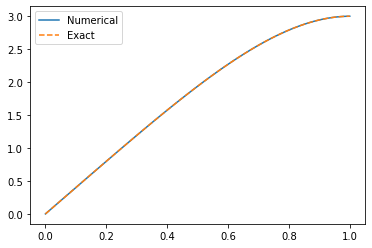

In [15]:
plt.plot(x,new_pot, label = "Numerical")
plt.plot(x, x*(4-x**3),'--',label = "Exact")
#plt.plot(x, x*(1-x**3),'--',label = "Exact")
plt.legend()
plt.show()

# 2D

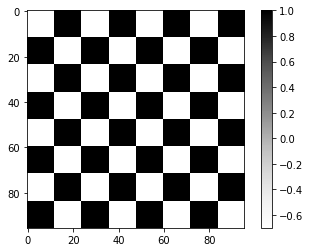

In [21]:
N = 8*12
ITERMAX = 100000
omega = 1
x = np.linspace(0,1,N)
y = np.linspace(0,1,N)
extent = [np.min(x), np.max(x), np.min(y), np.max(y)]
h = np.abs(x[1] - x[0])
#omega = 1/(1+np.sin(np.pi*h)) #Optimal omega for 2D Poisson
X,Y = np.meshgrid(x,y, indexing = 'xy') # Carefull here!
pot = np.ones((N,N),dtype = np.float64)
source = np.zeros(shape = (N,N), dtype = np.double)
#source [50,20] = 5
#source[50,80] = -5
source = -1 * (np.sin(np.pi*X)*np.cos(np.pi*Y) + np.sin(5.0*np.pi*X)*np.cos(5.0*np.pi*Y))
#source = np.exp(-30*( (X- 0.8)**2 + (Y-0.3)**2))
energy = np.zeros(ITERMAX,dtype=np.float64)
diff = 1
tolerance = 1e-10
def setborder( array,value):
    array[0,:] = value
    array[-1,:] = value
    array[:,0] = value
    array[:,-1] = value


setborder(pot,0)
new_pot = np.copy(pot)
mask = np.zeros( shape = (N,N), dtype = bool)
mask [ int(0.2*N): int(0.8*N), int(0.4*N): int(0.6*N)] = True

#N = 8*12
zeros = -0.7*np.ones(shape = (N//8,N//8))
ones = np.ones(shape = (N//8,N//8))
row1 = np.hstack((zeros,ones))
row2 = np.hstack((ones,zeros))
piece = np.vstack((row1,row2))
chessboard = np.tile(piece,[4,4])
plt.imshow(chessboard,interpolation='none',cmap = "Greys")
plt.colorbar()
plt.show()

source = chessboard


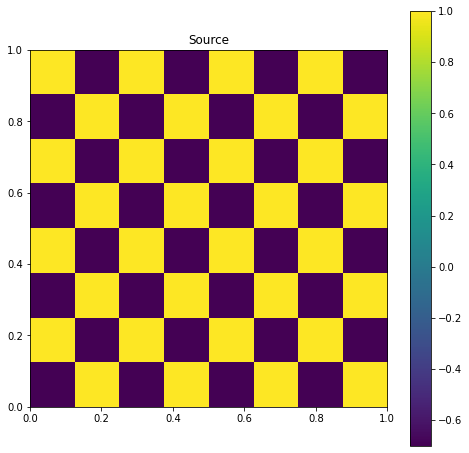

In [22]:
fig = plt.figure( figsize = (8,8))
plt.imshow(source, origin ='lower' , extent = extent)
#plt.imshow(np.sin(3*X), origin = 'lower')
plt.title("Source")
plt.colorbar()
plt.savefig('source.png')
plt.show()


In [23]:
i = 0
A = 0
while(diff > tolerance):
    if( i >= ITERMAX):
        print("Reached iteration limit, Stopping.")
        break
    new_pot[1:-1,1:-1] = (1-omega)*pot[1:-1,1:-1]+ (omega/4)*(pot[2:,1:-1]+pot[:-2,1:-1]+pot[1:-1,2:]+pot[1:-1,:-2] + h**2 * source[1:-1,1:-1])
    #new_pot[mask] = 0
    #new_pot[1:-1,0] = (1-omega)*pot[1:-1,0] + (omega/4)*( pot[2:,0] + pot[:-2,0] + 2*pot[1:-1,1] - 2*h*A  + h**2 * source[1:-1,0] )
    #new_pot[1:-1,-1] = (1-omega)*pot[1:-1,-1] + (omega/4)*( pot[2:,-1] + pot[:-2,-1] + 2*pot[1:-1,-2] + 2*h*A  + h**2 * source[1:-1,-1] )
    #new_pot[0,1:-1] = (1-omega)*pot[0,1:-1] + (omega/4)*( pot[0,2:] + pot[0,:-2] + 2*pot[1,1:-1] - 2*h*A  + h**2 * source[0,1:-1] )
    #new_pot[-1,1:-1] = (1-omega)*pot[-1,1:-1] + (omega/4)*( pot[-1,2:] + pot[-1,:-2] + 2*pot[-2,1:-1] + 2*h*A  + h**2 * source[-1,1:-1] )

    
    #energy[i] = 0.5* np.sum( (new_pot[1:,1:]-new_pot[:-1,1:])**2 + (new_pot[1:,1:]-new_pot[1:,:-1])**2   ) - h**2 * np.sum(source*new_pot)
    diff = np.sum( (new_pot - pot)**2  )
    #setborder_neumann(new_pot)
    np.copyto(pot,new_pot)
    i+= 1
    
print(i,diff,energy[i-1])

15247 9.990456221038965e-11 0.0


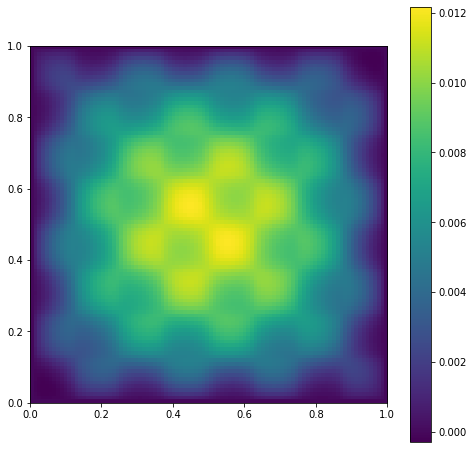

In [24]:
#plt.contourf(x, y, new_pot, 100)
fig = plt.figure( figsize = (8,8))
plt.imshow(new_pot,origin='lower', extent = extent)
plt.colorbar()
plt.savefig('sol.png')
plt.show()

exsol = (-1.0/(2.0*np.pi**2)*np.sin(np.pi*X)*np.cos(np.pi*Y)
        - 1.0/(50.0*np.pi**2)*np.sin(5.0*np.pi*X)*np.cos(5.0*np.pi*Y))

#fig = plt.figure( figsize = (8,8))
#plt.imshow(exsol, origin ='lower', extent = extent)
#plt.colorbar()
#plt.show()

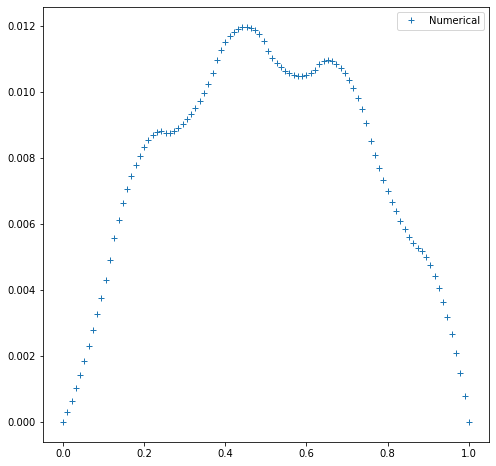

In [25]:
fig = plt.figure( figsize = (8,8))
plt.plot(x,pot[50],'+',label = 'Numerical')
plt.legend()
plt.show()

In [26]:
def grad( pot , hx , hy=0 ):
    if (hy == 0): hy = hx
    Gx = np.zeros(shape = (N,N) , dtype = np.double)
    Gy = np.zeros(shape = (N,N) , dtype = np.double)

    Gy[1:-1] = (pot[2:] - pot[:-2])/(2*hy)
    Gx[:,1:-1] = (pot[:,2:] - pot[:,:-2])/(2*hx)
    Gy[0,:] = (pot[1,:] - pot[0,:])/hy
    Gy[-1,:] = (pot[-1,:] - pot[-2,:])/hy

    Gx[:,0] = (pot[:,1] - pot[:,0])/hx
    Gx[:,-1] = (pot[:,-1] - pot[:,-2])/hx
    return Gx,Gy 

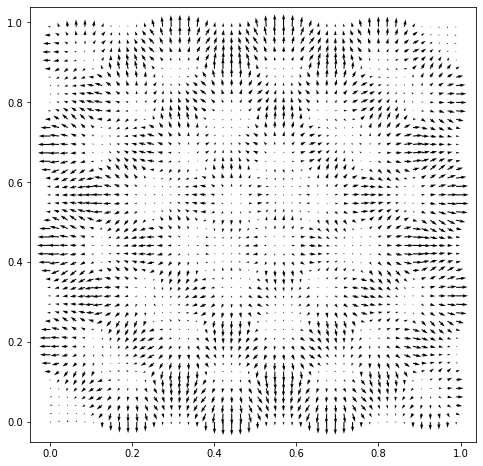

In [31]:
fig = plt.figure( figsize = (8,8))

G = grad(new_pot,h)
Ex = -G[0]
Ey = -G[1]
step = 2
plt.quiver(X[::step,::step],Y[::step,::step],Ex[::step,::step],Ey[::step,::step])
plt.savefig('efield.png')
plt.show()


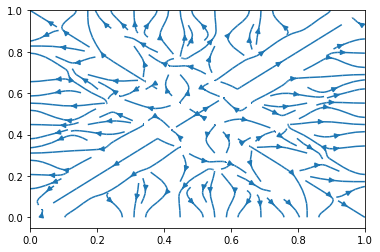

In [28]:
plt.streamplot(X,Y,Ex,Ey)
plt.savefig("streamplot.png")
plt.show()